In [1]:
# Import library needed
import pandas as pd
import pickle
from random import randint

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


# Function
def save_pkl(obj: any, name: str):
    """Saves an object to a pickle file, ensuring proper file extension and security.

    Args:
        obj: The object to serialize and save.
        name (str): The desired filename or path.
            - If it doesn't end with ".pkl", `.pkl` will be appended.
            - Supports relative and absolute paths.
        protocol (int, optional): The pickle protocol version to use. Defaults to the
            highest compatible with the current Python version.

    Raises:
        ValueError: If `name` is an empty string or if file operations fail.
        PickleError: If pickling encounters an error.
    """

    
    if len(name) == 0:
        raise ValueError("Filename cannot be empty")

    if not name.endswith(".pkl"):
        name += ".pkl"

    try:
        with open(name, 'wb') as file:
            pickle.dump(obj, file)
    except (OSError, IOError) as e:
        raise ValueError(f"Failed to save pickle file: {e}") from e
    except pickle.PickleError as e:
        raise pickle.PickleError(f"Pickling error: {e}") from e

    print(f"Saved: \"{name}\"")

def load_pkl(name: str):
    if len(name) == 0:
        raise ValueError("Filename cannot be empty")

    with open(name, 'rb') as file:
        return pickle.load(file)

def model_information(model, X_test, y_test):
    import numpy as np
    import matplotlib.pyplot as plt
    
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print("Overall accuracy model:")
    print(f"Accuracy  = {accuracy*100:<.2f}%")
    print(f"Precision = {precision*100:<.2f}%")
    print(f"Recall    = {recall*100:<.2f}%")
    print(f"F1-score  = {f1*100:<.2f}%\n")
    
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

    heatmap = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    labels = np.unique(y_test)

    print("Accuracy model for each label:")
    for label in labels:
        idx = np.where(model.classes_ == label)[0][0]
        label_accuracy = cm[idx, idx] / np.sum(cm[idx, :])
        print(f"{label:<14s}= {label_accuracy*100:.2f}%")

    heatmap.plot()
    plt.show()


In [2]:
# Read dataset
df = pd.read_csv('imo.csv')

In [3]:
# Display data
df_notna = df[df["label"].notna()]
df_notna.reset_index(drop=True, inplace=True)

# Split
X, y = df_notna["post_canonical"], df_notna["label"]

# display(df_notna.sample(n=4))
print(f"{df_notna.shape}\n")

number_of_occurrences = [
    df_notna[df_notna['label'] == 'Algebra'].shape[0],
    df_notna[df_notna['label'] == 'Combinatorics'].shape[0],
    df_notna[df_notna['label'] == 'Geometry'].shape[0],
    df_notna[df_notna['label'] == 'Number Theory'].shape[0]
]
print(f"Algebra       = {number_of_occurrences[0]}")
print(f"Combinatorics = {number_of_occurrences[1]}")
print(f"Geometry      = {number_of_occurrences[2]}")
print(f"Number Theory = {number_of_occurrences[3]}")


(3073, 10)

Algebra       = 695
Combinatorics = 600
Geometry      = 1100
Number Theory = 678


In [4]:
# # Kurangi geometry 315 soal
# df_notna = df[df["label"].notna()]
# df_notna.reset_index(drop=True, inplace=True)

# aa = df_notna[df_notna['label'] == "Algebra"].sample(695)
# cc = df_notna[df_notna['label'] == "Combinatorics"].sample(600)
# gg = df_notna[df_notna['label'] == "Geometry"].sample(820)
# nt = df_notna[df_notna['label'] == "Number Theory"].sample(678)
# del df_notna
# df_notna = pd.concat([aa, cc, gg, nt], axis=0)

# for i in range(232):
#     df_notna = df_notna.sample(frac=1, random_state=i+randint(1, 100))
#     df_notna = df_notna.sample(frac=1)

# df_notna.reset_index(drop=True, inplace=True)

# # Split
# X, y = df_notna["post_canonical"], df_notna["label"]

# print(f"{df_notna.shape}\n")
# number_of_occurrences = [
#     df_notna[df_notna['label'] == 'Algebra'].shape[0],
#     df_notna[df_notna['label'] == 'Combinatorics'].shape[0],
#     df_notna[df_notna['label'] == 'Geometry'].shape[0],
#     df_notna[df_notna['label'] == 'Number Theory'].shape[0]
# ]
# print(f"Algebra       = {number_of_occurrences[0]}")
# print(f"Combinatorics = {number_of_occurrences[1]}")
# print(f"Geometry      = {number_of_occurrences[2]}")
# print(f"Number Theory = {number_of_occurrences[3]}")


In [5]:
df_notna = df[df["label"].notna()]
df_notna.reset_index(drop=True, inplace=True)

Overall accuracy model:
Accuracy  = 88.13%
Precision = 88.23%
Recall    = 88.13%
F1-score  = 88.06%

Accuracy model for each label:
Algebra       = 88.24%
Combinatorics = 79.20%
Geometry      = 96.88%
Number Theory = 81.54%


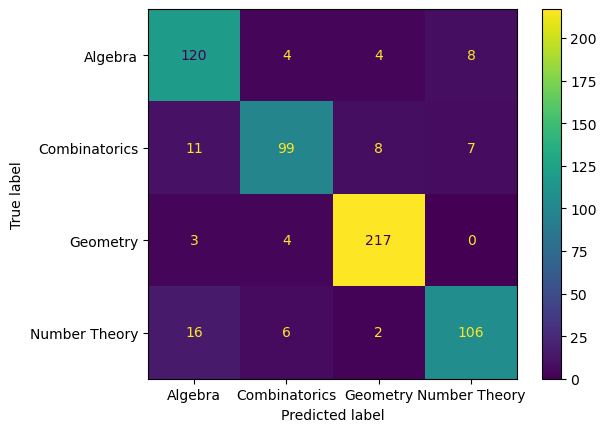

In [6]:
# Preprocess text data (Representation text to numeric)
vectorizer = TfidfVectorizer()
text_features = vectorizer.fit_transform(X)

# Split training and test 
X_train, X_test, y_train, y_test = train_test_split(text_features, y, test_size=0.2, random_state=4)

# Train the Naive Bayes model with train dataset
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
model_information(model, X_test, y_test)


In [9]:
# # Save model
# with open('multinomialNB_9057_acc.pkl', 'wb') as file:
#     pickle.dump(model, file)
    
# # Load model
# with open('SVC_9239_acc.pkl', 'rb') as file:
#     model = pickle.load(file)


# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#7b6b59;overflow:hidden">Model berhasil dibuat <br> Markicob sampel pada data yang belum terlabel</div>


In [15]:
data_isnull = df[df['label'].isnull()]
data_isnull.reset_index(drop=True, inplace=True)


In [16]:
# RANDOM
temp = data_isnull.sample(10)
n = randint(0, 9)

teks_soal = temp.iloc[n, :].post_canonical


display(temp[["id_key", "no", "year", "post_rendered", "post_canonical", "label"]])
print("\n\nEXAMPLE:")
print(f"{teks_soal}\n")

print(f"id_key: {temp.iloc[n, :].id_key}")
print(f"no    : {temp.iloc[n, :].no}")
print(f"year  : {temp.iloc[n, :].year}")
print(f"Link → {temp.iloc[n, :].link}")


,id_key,no,year,post_rendered,post_canonical,label
171,327,6,1975_imo,Determine the polynomials P of two variables s...,Determine the polynomials P of two variables s...,NaN
485,1519,2,1983_imo_shortlist,"Let <img src=""//latex.artofproblemsolving.com/...",Let $n$ be a positive integer. Let $\sigma(n)$...,NaN
1027,2138,38,1990_imo_longlists,"Let <img src=""//latex.artofproblemsolving.com/...",Let $\alpha$ be the positive root of the quadr...,NaN
4716,6779,4,2012_imc,"Let <img src=""//latex.artofproblemsolving.com/...",Let $f:\;\mathbb{R}\to\mathbb{R}$ be a continu...,NaN
2529,3871,5,1990_austrianpolish_competition,"Let <img src=""//latex.artofproblemsolving.com/...","Let $n>1$ be an integer and let $f_1$, $f_2$, ...",NaN
6211,8999,6,2022_rioplatense_mathematical_olympiad,"Let <img src=""//latex.artofproblemsolving.com/...","Let $N(a,b)$ be the number of ways to cover a ...",NaN
379,1387,18,1989_imo_shortlist,"Given a convex polygon <img src=""//latex.artof...",Given a convex polygon $ A_1A_2 \ldots A_n$ wi...,NaN
3158,4941,2,1999_baltic_way,"Determine all positive integers <img src=""//la...",Determine all positive integers $n$ with the p...,NaN
6590,9483,(059) A4,1984_tournament_of_towns,Show how to cut an isosceles right triangle in...,Show how to cut an isosceles right triangle in...,NaN
7535,10541,P2,20202021_tournament_of_towns,Maria has a balance scale that can indicate wh...,Maria has a balance scale that can indicate wh...,NaN




EXAMPLE:
Let $\alpha$ be the positive root of the quadratic equation $x^2 = 1990x + 1$. For any $m, n \in \mathbb N$, define the operation $m*n = mn + [\alpha m][ \alpha n]$, where $[x]$ is the largest integer no larger than $x$. Prove that $(p*q)*r = p*(q*r)$ holds for all $p, q, r \in \mathbb N.$

id_key: 2138
no    : 38
year  : 1990_imo_longlists
Link → https://artofproblemsolving.com/community/c4021_1990_imo_longlists


In [17]:
while True:
    x = int(input())
    teks_soal = df[df['id_key'] == x].iloc[0, :].post_canonical
    print(teks_soal)

    # PREDICT HERE
    sample = [str(teks_soal)]
    processed = vectorizer.transform(sample)
    pred = model.predict_proba(processed)

    class_labels = model.classes_
    class_probabilities = {class_labels[i]: pred[0][i] * 100 for i in range(len(class_labels))}
    # print(class_probabilities)

    sorted_class_probabilities = {label: class_probabilities[label] for label in ['Algebra', 'Combinatorics', 'Geometry', 'Number Theory']}
    # print(sorted_class_probabilities)

    print()
    for label, prob in zip(class_labels, pred[0]):
        print(f"{label:<14s}= {prob*100:.2f}%")
        

Let $\alpha$ be the positive root of the quadratic equation $x^2 = 1990x + 1$. For any $m, n \in \mathbb N$, define the operation $m*n = mn + [\alpha m][ \alpha n]$, where $[x]$ is the largest integer no larger than $x$. Prove that $(p*q)*r = p*(q*r)$ holds for all $p, q, r \in \mathbb N.$

Algebra       = 71.61%
Combinatorics = 2.79%
Geometry      = 0.08%
Number Theory = 25.52%
A circle has center on the side $AB$ of the cyclic quadrilateral $ABCD$. The other three sides are tangent to the circle. Prove that $AD+BC=AB$.

Algebra       = 0.00%
Combinatorics = 0.00%
Geometry      = 100.00%
Number Theory = 0.00%
Find the digits left and right of the decimal point in the decimal form of the number \[ (\sqrt{2} + \sqrt{3})^{1980}. \]

Algebra       = 8.79%
Combinatorics = 2.90%
Geometry      = 1.01%
Number Theory = 87.31%
Prove that $0\le yz+zx+xy-2xyz\le{7\over27}$, where $x,y$ and $z$ are non-negative real numbers satisfying $x+y+z=1$.

Algebra       = 99.61%
Combinatorics = 0.19%
Geomet

ValueError: invalid literal for int() with base 10: ''